In [1]:
#import libraries
import pandas as pd
import pushbullet
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install pushbullet.py

Note: you may need to restart the kernel to use updated packages.


In [3]:
pb = pushbullet.Pushbullet("o.UNlF6TUofeQgKFGooASh2KsjeZZq43Ma")

In [4]:
pushes=pb.get_pushes()

In [5]:
latest=pushes[0]

In [6]:
url=latest["file_url"]

In [7]:
file_path="coordinators chat.txt.txt"

In [8]:
with open(file_path,mode="r",encoding="utf8") as f:
    data=f.readlines()

In [9]:
data

['10/4/22, 1:18 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '8/11/21, 3:57 PM - You created group "Coordinators"\n',
 '11/21/22, 10:44 AM - Bro Shado added Bro vincent\n',
 '11/21/22, 10:44 AM - Bro Shado added Gracious\n',
 '12/6/22, 1:18 PM - Bro Shado: <Media omitted>\n',
 '12/9/22, 2:49 AM - Bro Shado: *SUGGESTIONS FOR THE GET TOGETHER*\n',
 '\n',
 'GOAL: To know one another and develop a common goal for the group/level.\n',
 '\n',
 'DURATION: 3 hours\n',
 '\n',
 'ACTIVITIES\n',
 '✓ Interactions \n',
 '✓ Group breakout by faculty\n',
 '✓ Giveaways\n',
 '✓Refreshments\n',
 '\n',
 '\n',
 '✓ Personal finance\n',
 '✓ Conflict resolution\n',
 '✓ Your identity in Christ\n',
 '\n',
 'INVOLVING MEMBERS OF THE GROUP\n',
 '\n',
 'Tell someone to tell someone 💦🌴\n',
 '12/9/22, 2:50 AM - Bro Shado: @2348137297591 please send in the proposed topics for brothers and the general discussion 🙇🏾

In [10]:
data[2]

'11/21/22, 10:44 AM - Bro Shado added Bro vincent\n'

In [11]:
date_pattern = r"^\d{1,2}/\d{1,2}/\d{2,4}"
time_pattern = r"\d{1,2}:\d{2}\s[AP]M"
name_pattern = r"(?<=- )(.*?)(?=:)"
message_pattern = r"(?<=: )(.*)(?=\n)"

In [12]:
# Lists to store the extracted data
dates = []
times = []
names = []
messages = []

In [13]:
# Loop through the lines of the WhatsApp chat and extract the relevant information
for line in data:
    date_match = re.search(date_pattern, line)
    time_match = re.search(time_pattern, line)
    name_match = re.search(name_pattern, line)
    message_match = re.search(message_pattern, line)

    if date_match and time_match and name_match and message_match:
        dates.append(date_match.group())
        times.append(time_match.group())
        names.append(name_match.group())
        messages.append(message_match.group())

In [14]:
len(messages)

645

In [15]:
# Create a pandas DataFrame from the extracted data
df = pd.DataFrame({
    "Date": dates,
    "Time": times,
    "Name": names,
    "Message": messages
})

In [16]:
df

,Date,Time,Name,Message
0,12/6/22,1:18 PM,Bro Shado,<Media omitted>
1,12/9/22,2:49 AM,Bro Shado,*SUGGESTIONS FOR THE GET TOGETHER*
2,12/9/22,2:50 AM,Bro Shado,@2348137297591 please send in the proposed top...
3,12/9/22,2:50 AM,Bro Shado,The graphic team are anxiously waiting 😁
4,12/9/22,9:05 AM,Bro vincent,"Oh, Good morning everyone"
...,...,...,...,...
640,2/20/23,9:01 PM,Bro Shado,<Media omitted>
641,2/20/23,9:02 PM,Bro Shado,"@2348106608611 I can sight you oo 😁, you wan r..."
642,2/20/23,9:05 PM,Sis Abimbola,🤣😂😂😂😂
643,2/20/23,9:08 PM,Sis Abimbola,Ok sir


In [17]:
#lets define a function to remove emojis
def remove_emoji(text):
    # Emoji ranges for common emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F910-\U0001F95F"  # emojis with accessories
        u"\U0001F980-\U0001F9FF"  # food, animals, and plants
        u"\U0001F1F2-\U0001F1F4"  # flag emojis
        u"\U0001F1E6-\U0001F1FF"  # flag emojis
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U00002702-\U000027B0"  # other emoticons
        u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [18]:
df['Message'] = df['Message'].apply(remove_emoji)#apply the emoji funtion

In [19]:
df.head()

,Date,Time,Name,Message
0,12/6/22,1:18 PM,Bro Shado,<Media omitted>
1,12/9/22,2:49 AM,Bro Shado,*SUGGESTIONS FOR THE GET TOGETHER*
2,12/9/22,2:50 AM,Bro Shado,@2348137297591 please send in the proposed top...
3,12/9/22,2:50 AM,Bro Shado,The graphic team are anxiously waiting
4,12/9/22,9:05 AM,Bro vincent,"Oh, Good morning everyone"


In [20]:
df = df.drop(df[df["Message"] == "<Media omitted>"].index)

In [21]:
# remove phone numbers starting with "@"
df['Message'] = df['Message'].str.replace(r'@\d+', '');

C:\Users\PC\AppData\Local\Temp\ipykernel_2580\1669088430.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Message'] = df['Message'].str.replace(r'@\d+', '');


In [22]:
#remove special character
df["Message"]=df["Message"].str.replace("[^\w\s]","")

C:\Users\PC\AppData\Local\Temp\ipykernel_2580\1222295757.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Message"]=df["Message"].str.replace("[^\w\s]","")


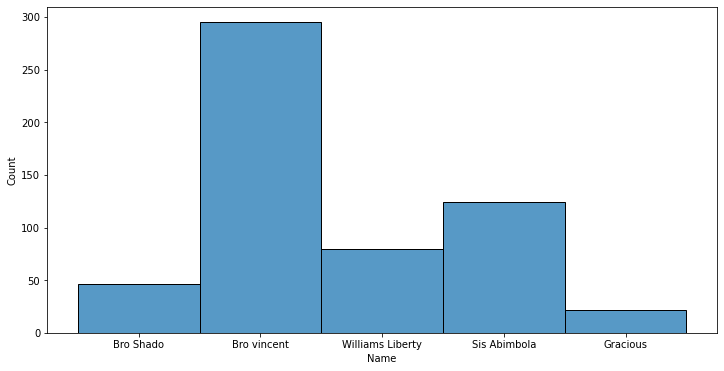

In [23]:
#A histogram showing the level of participation in the group
plt.figure(figsize=(12,6))
sns.histplot(df["Name"]);

<Figure size 2160x720 with 0 Axes>

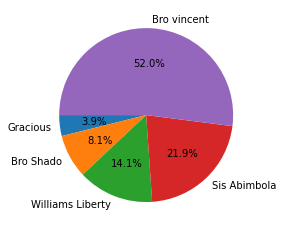

<Figure size 2160x720 with 0 Axes>

In [24]:
#lets view this using a pie chart to know the person with the highest percentage of participation
fer=df["Name"].value_counts(normalize=True,ascending=True)*100
plt.pie(fer,labels=fer.index,autopct="%1.1f%%",startangle=180)
plt.figure(figsize=(30,10))

NameError: name 'autotexts' is not defined

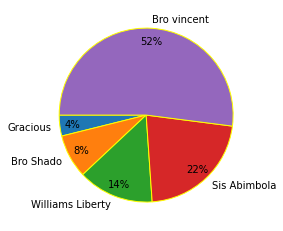

In [25]:
# Create a doughnut pie chart
plt.pie(fer, labels=fer.index, wedgeprops={'edgecolor': 'yellow'}, startangle=180, autopct='%1.0f%%',pctdistance=0.85)
# Set the color of the percentage values
for autotext in autotexts:
    autotext.set_color('white')


In [ ]:
#viewing it through a doughnut pie chart
plt.figure(figsize=(30,10))
# Create a circle for the center of the chart
my_circle = plt.Circle((0, 0), 0.7, color='white')

# Create a doughnut pie chart
wedges, texts, autotexts = plt.pie(fer, labels=fer.index, wedgeprops={'edgecolor': 'white'}, startangle=180,
                                   autopct=lambda pct: '{:.1f}%'.format(pct), pctdistance=0.85)

# Set the color of the percentage values
for autotext in autotexts:
    autotext.set_color('yellow')
    autotext.set_fontweight('bold')
# Add the circle to the center of the chart
fig = plt.gcf()
fig.gca().add_artist(my_circle);